# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Extra Chapter

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.datasets import make_regression
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [12]:
from data_generation.ball import load_data
from plots.chapterextra import build_model, get_plot_data, plot_violins, plot_schemes, plot_scheme_bn, distributions, compare_grads, gradient_distrib
from stepbystep.v1 import StepByStep

# Vanishing and Exploding Gradients

## Vanishing Gradients

## Ball Dataset and Block Model

In [5]:
x, y = load_data(n_points=1000, n_dims=10)

In [11]:
x.shape

(1000, 10)

In [6]:
ball_dataset = TensorDataset(torch.as_tensor(x).float(), torch.as_tensor(y).float())
ball_loader = DataLoader(dataset=ball_dataset, batch_size=len(x))

In [168]:
torch.manual_seed(11)
n_features = x.shape[1]
n_layers = 5
n_hidden_units = 100
activation_fn = nn.ReLU
model = build_model(n_features, n_layers, n_hidden_units, activation_fn, use_bn=False)
model

Sequential(
  (h1): Linear(in_features=10, out_features=100, bias=True)
  (a1): ReLU()
  (h2): Linear(in_features=100, out_features=100, bias=True)
  (a2): ReLU()
  (h3): Linear(in_features=100, out_features=100, bias=True)
  (a3): ReLU()
  (h4): Linear(in_features=100, out_features=100, bias=True)
  (a4): ReLU()
  (h5): Linear(in_features=100, out_features=100, bias=True)
  (a5): ReLU()
  (o): Linear(in_features=100, out_features=1, bias=True)
)

In [169]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Weights, Activations, and Gradients

In [9]:
hidden_layers = [f'h{i}' for i in range(1, n_layers + 1)]
activation_layers = [f'a{i}' for i in range(1, n_layers + 1)]

sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loaders(ball_loader)
sbs.capture_parameters(hidden_layers)
sbs.capture_gradients(hidden_layers)
sbs.attach_hooks(activation_layers)
sbs.train(1)

In [22]:
parms, gradients, activations = get_plot_data(train_loader=ball_loader, model=model)

/zdata/Github/pytorchsbs/plots/chapterextra.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())


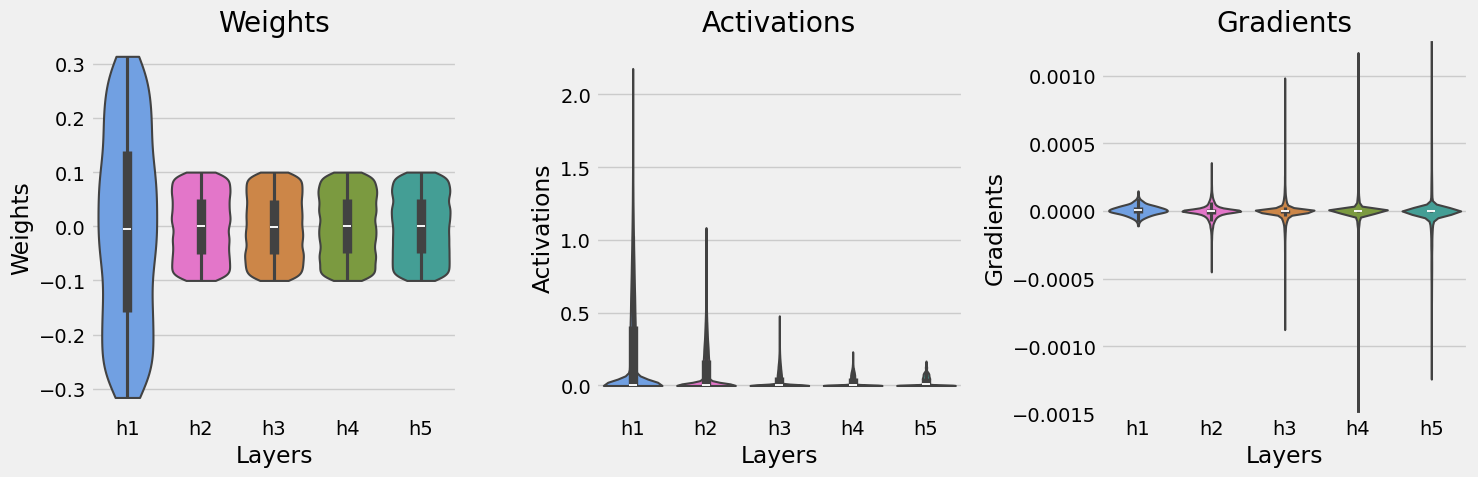

In [29]:
fig = plot_violins(parms, gradients, activations)

## Initialization Schemes

In [4]:
def weights_init(model):
    if isinstance(model, nn.Linear):
        nn.init.kaiming_uniform_(model.weight, nonlinearity='relu')
        if model.bias is not None:
            nn.init.zeros_(model.bias)

In [10]:
with torch.no_grad():
    model.apply(weights_init)

/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used wi

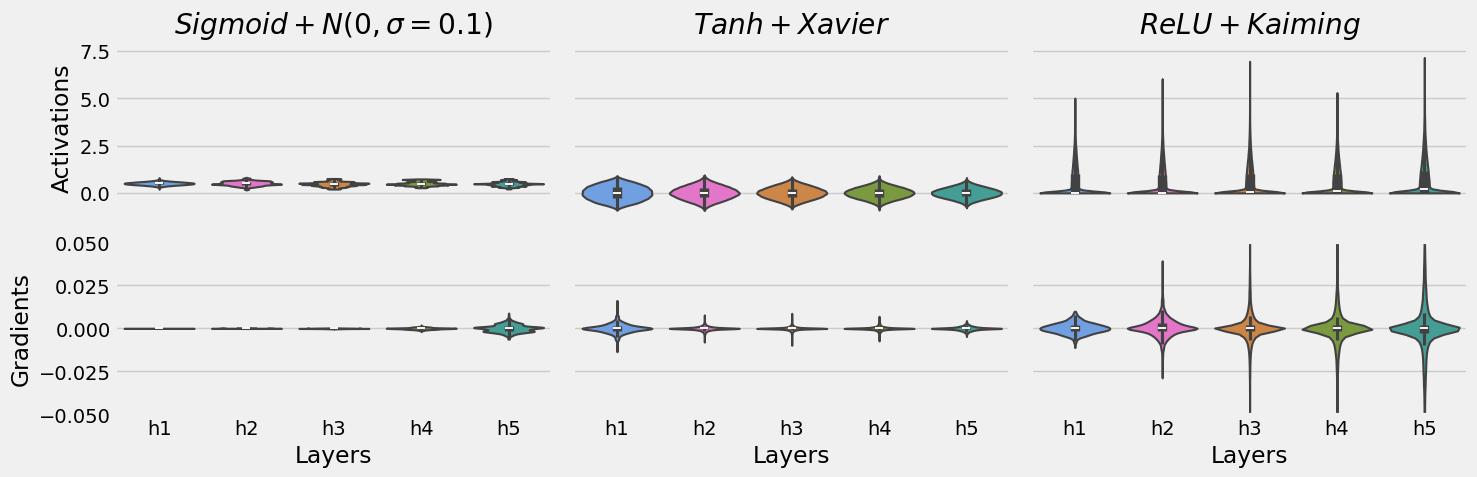

In [22]:
fig = plot_schemes(n_features, n_layers, n_hidden_units, ball_loader)

## Batch Normalization

/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lv.ax.set_xticklabels(df.layers.unique())
/zdata/Github/pytorchsbs/plots/chapterextra.py:143: UserWarning: set_ticklabels() should only be used wi

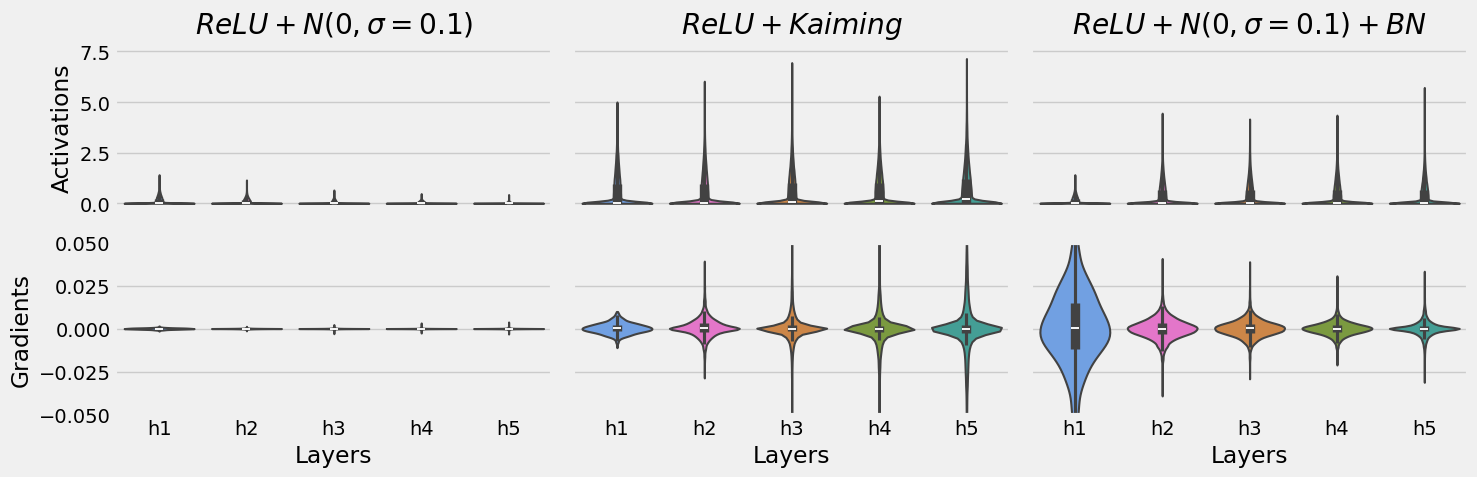

In [24]:
fig = plot_scheme_bn(n_features, n_layers, n_hidden_units, ball_loader)

## Exploding Gradients

## Data Generation & Preparation

In [5]:
x_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
x_reg = torch.as_tensor(x_reg).float()
y_reg = torch.as_tensor(y_reg).float()

dataset = TensorDataset(x_reg, y_reg)
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

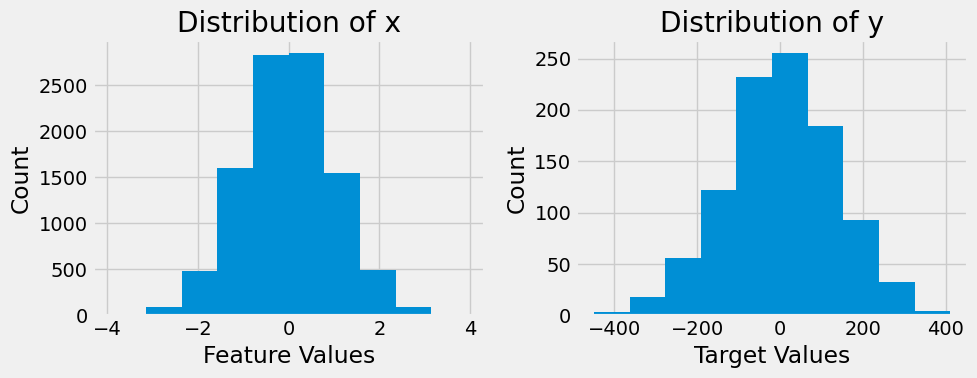

In [33]:
fig = distributions(x_reg, y_reg)

## Model Configuration & Training

In [6]:
torch.manual_seed(11)
model = nn.Sequential()
model.add_module('fc1', nn.Linear(10, 15))
model.add_module('act', nn.ReLU())
model.add_module('fc2', nn.Linear(15, 1))
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03509966)

In [141]:
sbs_reg = StepByStep(model, loss_fn, optimizer)
sbs_reg.set_loaders(train_loader)
sbs_reg.capture_gradients(['fc1'])

In [142]:
sbs_reg.train(2)
sbs_reg.losses

[np.float64(2.7670513733822185e+29), np.float64(nan)]

In [144]:
grads = np.array(sbs_reg._gradients['fc1']['weight'])
print(grads.mean(axis=(1, 2)))

[ 2.44117905e-02  2.06106851e-01  1.81766347e-02 -2.35392176e+00
  1.11135334e+01 -2.45726564e+01 -6.84081076e-01 -5.51755449e+00
  2.17133981e+00  1.24698135e+00 -1.04324239e-01  9.37458067e-02
  2.01123643e-01  5.32199112e-01  2.62268398e+01 -2.59524339e+01
  6.88615245e-01 -1.83998085e-01 -3.75629093e+00 -1.86331088e-01
  2.50075083e+00  1.52384045e-01  9.11065417e-03  6.15998185e-02
  7.58073210e-01  4.96338612e-01  7.26849278e-01  7.53988466e-02
  1.81392539e+01 -6.54686861e+01  1.38875571e+07 -2.59043075e+21
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan         

## Gradient Clipping

In [147]:
torch.manual_seed(42)
parm = nn.Parameter(torch.randn(2, 1))
fake_grads = torch.tensor([[2.5], [.8]])

### Value Clipping

In [148]:
parm.grad = fake_grads.clone()
# Gradient Value Clipping
nn.utils.clip_grad_value_(parm, clip_value=1.0)
parm.grad

tensor([[1.0000],
        [0.8000]])

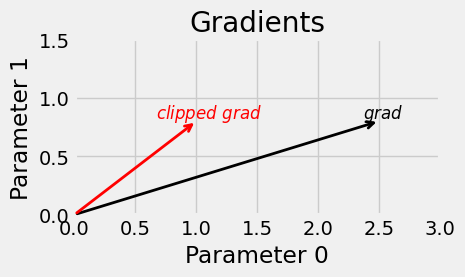

In [150]:
fig = compare_grads(fake_grads, parm.grad)

In [151]:
def clip_backprop(model, clip_value):
    handles = []
    for p in model.parameters():
        if p.requires_grad:
            func = lambda grad: torch.clamp(grad, -clip_value, clip_value)
            handle = p.register_hook(func)
            handles.append(handle)
    return handles

### Norm Clipping

In [153]:
parm.grad = fake_grads.clone()
# Gradient Norm Clipping
nn.utils.clip_grad_norm_(parm, max_norm=1.0, norm_type=2)
print(fake_grads)
print(fake_grads.norm())
print(parm.grad)
print(parm.grad.norm())

tensor([[2.5000],
        [0.8000]])
tensor(2.6249)
tensor([[0.9524],
        [0.3048]])
tensor(1.0000)


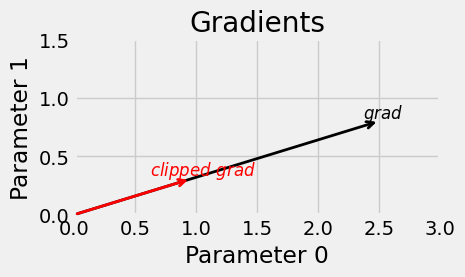

In [154]:
fig = compare_grads(fake_grads, parm.grad)

In [ ]:
    #     self.clipping = None

    # def set_clip_grad_value(self, clip_value):
    # def set_clip_grad_norm(self, max_norm, norm_type=2):
    # def remove_clip(self):
    # def _make_train_step_fn(self):

In [ ]:
    # def set_clip_backprop(self, clip_value):
    
    # def remove_clip(self):

## Model Configuration & Training

In [182]:
torch.manual_seed(42)
with torch.no_grad():
    model.apply(weights_init)

optimizer = optim.SGD(model.parameters(), lr=0.03509966)

In [18]:
sbs_reg_clip = StepByStep(model, loss_fn, optimizer)
sbs_reg_clip.set_loaders(train_loader)
sbs_reg_clip.set_clip_grad_value(1.0)
sbs_reg_clip.capture_gradients(['fc1'])
sbs_reg_clip.train(10)
sbs_reg_clip.remove_clip()
sbs_reg_clip.remove_hooks()

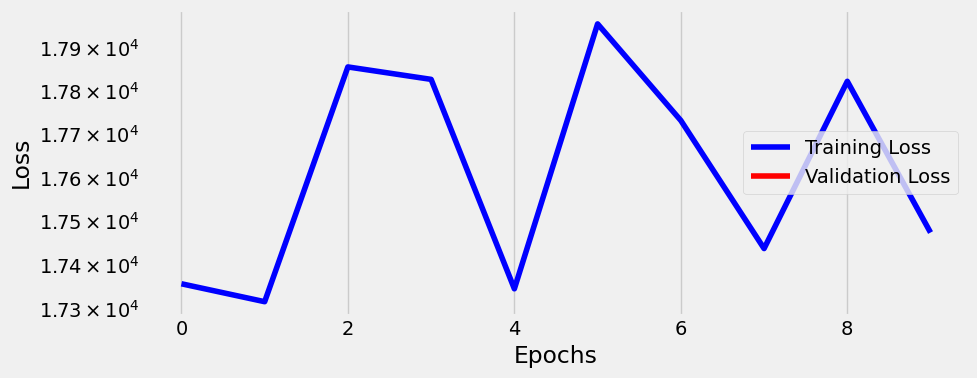

In [184]:
fig = sbs_reg_clip.plot_losses()

In [185]:
avg_grad = np.array(sbs_reg_clip._gradients['fc1']['weight']).mean(axis=(1, 2))
avg_grad.min(), avg_grad.max()

(np.float64(-6.1622835213318465), np.float64(1.5875422400461199))

## Clipping with Hooks

In [17]:
torch.manual_seed(42)
with torch.no_grad():
    model.apply(weights_init)

In [15]:
sbs_reg_clip_hook = StepByStep(model, loss_fn, optimizer)
sbs_reg_clip_hook.set_loaders(train_loader)
sbs_reg_clip_hook.set_clip_backprop(1.0)
sbs_reg_clip_hook.capture_gradients(['fc1'])
sbs_reg_clip_hook.train(10)
sbs_reg_clip_hook.remove_clip()
sbs_reg_clip_hook.remove_hooks()

/zdata/Github/zpytorch/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/zdata/Github/zpytorch/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


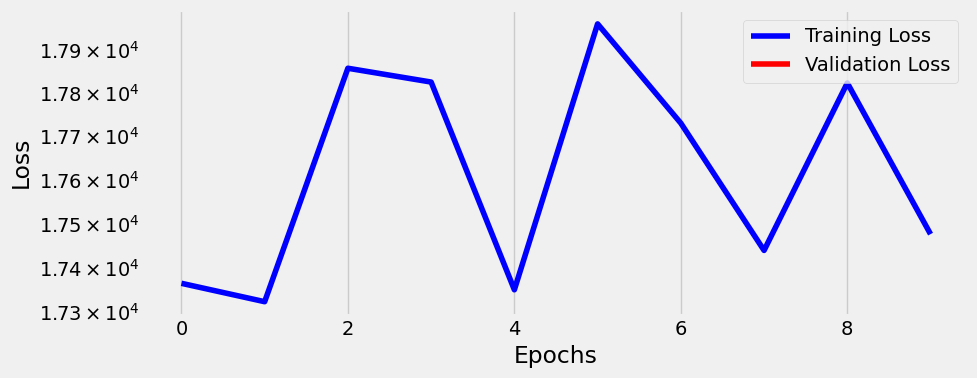

In [9]:
fig = sbs_reg_clip_hook.plot_losses()

In [10]:
torch.manual_seed(42)
with torch.no_grad():
    model.apply(weights_init)

optimizer = optim.SGD(model.parameters(), lr=0.01)

sbs_reg_clip_hook = StepByStep(model, loss_fn, optimizer)
sbs_reg_clip_hook.set_loaders(train_loader)
sbs_reg_clip_hook.set_clip_backprop(1.0)
sbs_reg_clip_hook.capture_gradients(['fc1'])
sbs_reg_clip_hook.train(10)
sbs_reg_clip_hook.remove_clip()
sbs_reg_clip_hook.remove_hooks()

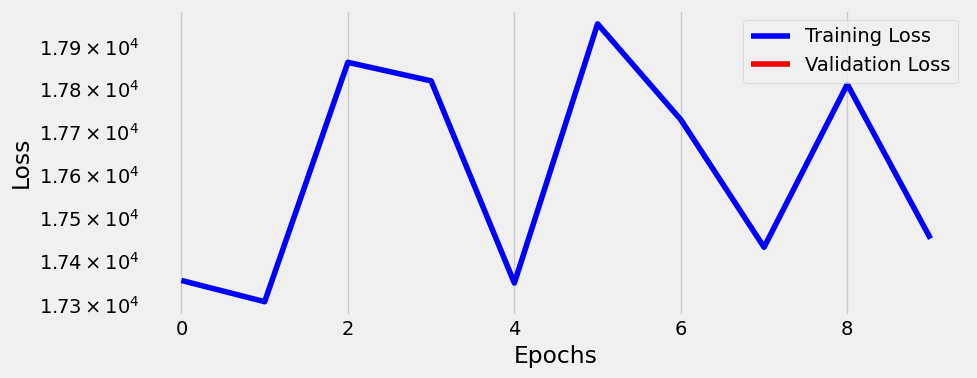

In [16]:
fig = sbs_reg_clip_hook.plot_losses()

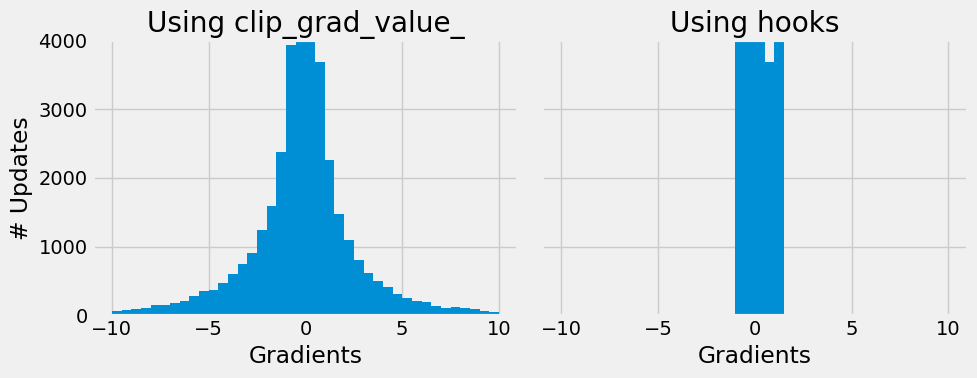

In [19]:
fig = gradient_distrib(sbs_reg_clip, 'fc1', sbs_reg_clip_hook, 'fc1')